### Import libraries

In [ ]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn import preprocessing
from sklearn.ensemble import RandomForestClassifier

from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import AdaBoostClassifier

import warnings
warnings.filterwarnings('ignore')

### Reading the input csv file

In [ ]:
data=pd.read_csv("/content/Fraud_check.csv")
data.head()

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,NO,Single,68833,50047,10,YES
1,YES,Divorced,33700,134075,18,YES
2,NO,Married,36925,160205,30,YES
3,YES,Single,50190,193264,15,YES
4,NO,Married,81002,27533,28,NO


### Check the statistics for basic understanding of the data

In [ ]:
data.describe()

,Taxable.Income,City.Population,Work.Experience
count,600.000000,600.000000,600.000000
mean,55208.375000,108747.368333,15.558333
std,26204.827597,49850.075134,8.842147
min,10003.000000,25779.000000,0.000000
25%,32871.500000,66966.750000,8.000000
50%,55074.500000,106493.500000,15.000000
75%,78611.750000,150114.250000,24.000000
max,99619.000000,199778.000000,30.000000


### Checking for the null values

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Undergrad        600 non-null    object
 1   Marital.Status   600 non-null    object
 2   Taxable.Income   600 non-null    int64 
 3   City.Population  600 non-null    int64 
 4   Work.Experience  600 non-null    int64 
 5   Urban            600 non-null    object
dtypes: int64(3), object(3)
memory usage: 28.2+ KB


### Checking for the duplicate values

In [ ]:
data[data.duplicated(keep = False)]

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban


### Create numerical variables for all categorical data, with label encoding

In [ ]:
label_encoder = preprocessing.LabelEncoder()
data['Undergrad']= label_encoder.fit_transform(data['Undergrad']) 
data['Marital.Status']= label_encoder.fit_transform(data['Marital.Status']) 
data['Urban']= label_encoder.fit_transform(data['Urban']) 

### Finding the average taxable income, which is 30000. Thus, anything above that can be considered as the income that is highly succesptable to riskier accounts

In [ ]:
data["Taxable.Income"]=(data["Taxable.Income"]>30000)*1

### Assigning the values of independent and target varibales from the data to a new variable

In [ ]:
x=data.drop(axis=0,columns="Taxable.Income")
y=data["Taxable.Income"]

In [ ]:
data["Taxable.Income"].value_counts()

1    476
0    124
Name: Taxable.Income, dtype: int64

### Train test split at a ratio of 70:30

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3)

### Constructing a Random forest classfier model

In [ ]:
model = RandomForestClassifier(n_estimators=110, max_features=3)

In [ ]:
model.fit(x_train,y_train)

RandomForestClassifier(max_features=3, n_estimators=110)

### Predicting the model on the train data, to evaluate the train accuracy

In [ ]:
Y_pred=model.predict(x_train)

In [ ]:
print("accuracy:",metrics.accuracy_score(y_train,Y_pred))

accuracy: 1.0


### Finding the train accuracy

In [ ]:
model.score(x_train, y_train)

1.0

### Predicting the model on the test data

In [ ]:
y_pred=model.predict(x_test)

In [ ]:
print("accuracy:",metrics.accuracy_score(y_test,y_pred))

accuracy: 0.7222222222222222


### Finding the test accuracy

In [ ]:
model.score(x_test, y_test)

0.7222222222222222

### Identifying the important features that contribute to the output and sorting it in ascending order

In [ ]:
feature_imp = pd.Series(model.feature_importances_,index=x.columns).sort_values(ascending=False)
feature_imp

City.Population    0.543530
Work.Experience    0.276254
Marital.Status     0.078138
Urban              0.051140
Undergrad          0.050938
dtype: float64

### Bar plot for representing the important features

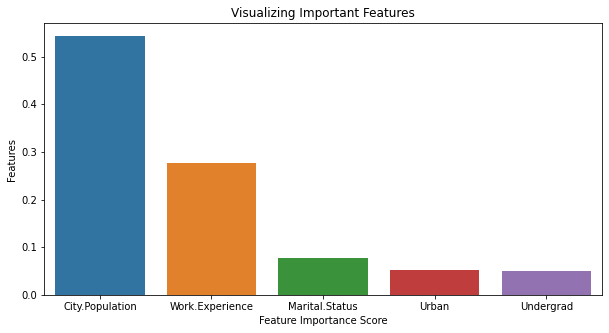

In [ ]:
plt.figure(figsize=(10,5))
sns.barplot(y=feature_imp, x=feature_imp.index)
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features")
plt.show()

### Running a loop from the range of 1 to 5 for different max_features in the Random forest classifier

In [ ]:
train_accuracy = []
test_accuracy = []
for max_features in range(1,10):
    model=RandomForestClassifier(n_estimators=110, max_features=3)
    model.fit(x_train, y_train)
    train_accuracy.append(model.score(x_train, y_train))
    test_accuracy.append(model.score(x_test, y_test))

### Jotting down the test accuracies for different max_features of the Random Forest classifier

In [ ]:
data = pd.DataFrame({'max_features':range(1,10),'train_acc':train_accuracy, 'test_acc':test_accuracy})
data

,max_features,train_acc,test_acc
0,1,1.0,0.727778
1,2,1.0,0.750000
2,3,1.0,0.733333
3,4,1.0,0.722222
4,5,1.0,0.722222
5,6,1.0,0.744444
6,7,1.0,0.733333
7,8,1.0,0.727778
8,9,1.0,0.733333


### Visualizing the accuracy graph for different max_depth parameters of the Random forest classifier

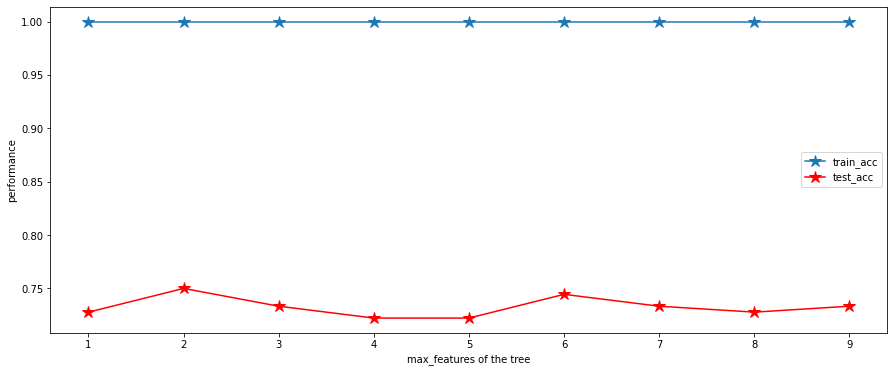

In [ ]:
labels =['train_acc','test_acc']
fig = plt.figure(figsize=(15,6))
ax = fig.add_subplot()
plt.plot(data['max_features'],data['train_acc'], marker = '*',markersize=12)
plt.plot(data['max_features'], data['test_acc'], marker = '*',markersize=12, color='red')
ax.set_xticks(np.arange(1,10))
plt.legend(labels)
plt.xlabel('max_features of the tree')
plt.ylabel('performance')
plt.show()

### Evaluation metric - Confusion matrix

In [ ]:
cm= confusion_matrix(y_test, y_pred) 
cm

array([[  2,  40],
       [ 10, 128]])

### Visualising the confusion Matrix with heatmap

Text(0.5, 1.0, 'Accuracy Score: 0.7333333333333333')

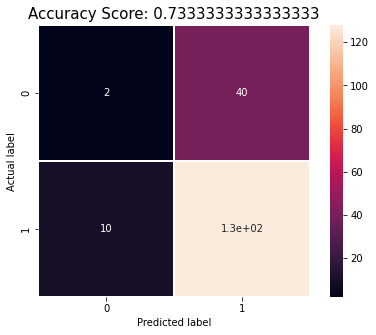

In [ ]:
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(7,5))
sns.heatmap(data=cm,linewidths=.5, annot=True,square = True)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
all_sample_title = 'Accuracy Score: {0}'.format(model.score(x_test, y_test))
plt.title(all_sample_title, size = 15)

### Predicting the values of test data and viewing the classification report

In [ ]:
y_pred = model.predict(x_test)
print("Classification report - \n", classification_report(y_test,y_pred))

Classification report - 
               precision    recall  f1-score   support

           0       0.20      0.05      0.08        42
           1       0.76      0.94      0.84       138

    accuracy                           0.73       180
   macro avg       0.48      0.49      0.46       180
weighted avg       0.63      0.73      0.67       180



### Trying a cross validation KFold split, to check if the accuracy of the model increases

In [ ]:
kfold=KFold(n_splits=8,random_state=7, shuffle=True)

In [ ]:
result=cross_val_score(model,x,y,cv=kfold)
print(result.mean())

0.745


### Constructing an Adaboost classifier to classify the highes risk of fraud taxable income, with teh cross validation Kfold 

In [ ]:
num_trees = 10
seed=7
kfold = KFold(n_splits=10, random_state=seed,shuffle=True)
model = AdaBoostClassifier(n_estimators=num_trees, random_state=seed)

### Evaluating the Adaboost classfier with Kfold and checking the accuracy  

In [ ]:
results = cross_val_score(model, x, y, cv=kfold)
print(results.mean())

0.7933333333333332


### Evaluating the Adaboost classfier with the train test split and checking the accuracy  

In [ ]:
model.fit(x_train,y_train)
print("accuracy:",model.score(x_train, y_train))

accuracy: 0.8047619047619048


### Predict the model on the test data

In [ ]:
y_pred=model.predict(x_test)

In [ ]:
print("accuracy:",metrics.accuracy_score(y_test,y_pred))

accuracy: 0.7666666666666667


### Consolidating

In [ ]:
data

,max_features,train_acc,test_acc
0,1,1.0,0.727778
1,2,1.0,0.750000
2,3,1.0,0.733333
3,4,1.0,0.722222
4,5,1.0,0.722222
5,6,1.0,0.744444
6,7,1.0,0.733333
7,8,1.0,0.727778
8,9,1.0,0.733333


## Conclusion:

### It is evident that the highest accuracy from the Random forest classifier is, when it takes 1 maximum feature, of 76.1% . Thus, it can be used as the final model to predict and meet the objective of the problem.
### Also, the Adaboost classifier gives an accuracy of 77.22% to classify the data that has a higher risk of bein a fraud in taxable income.